In [ ]:
# you 1st need to right click on the shared folder and select 'Add to my Drive'
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:


#!umount Downloads

umount: Downloads: no mount point specified.


In [ ]:
#paths to raster
dhs_survey_path = "/content/drive/MyDrive/omdena/omdena-nigeria/dataset/NG_2018_DHS_07162021_176_165261_survey.zip"
dhs_survey_data='/content/drive/MyDrive/omdena/omdena-nigeria/dataset/dhs_survey/NGPR7ADT'
lga_path ='/content/drive/MyDrive/omdena/omdena-nigeria/dataset/nigeria-lgas/new_lga_nigeria_2003.shp'
dhs_gps_path='/content/drive/MyDrive/omdena/omdena-nigeria/dataset/NG_2018_DHS_07172021_114_165261_gps.zip'
fb_sett_path='/content/drive/MyDrive/omdena/omdena-nigeria/dataset/hrsl_nga_v1_fb_settlement.zip'


In [ ]:
!pip install -q geopandas
import os
import glob

import numpy as np
import pandas as pd
 


 


     |████████████████████████████████| 994 kB 5.1 MB/s 
     |████████████████████████████████| 6.6 MB 16.2 MB/s 
     |████████████████████████████████| 15.4 MB 35 kB/s 


In [ ]:
gps_map_file = glob.glob(f'{dhs_survey_data}/*.MAP')[0]
strata_dta_file = map_file.replace('MAP', 'DTA')

In [ ]:
# !cat {gps_map_file}
!head -n25 {gps_map_file}

                                                   NGPR7AFL                                                   
                                                NGPR7AFL_DICT                                                 

                                        NGPR7AFL.DCF                                                          
                                    Last Modified:  11/4/2019  7:32:00 PM                                     

--------------------------------------------------------------------------------------------------------------
Level Name                    Level Label                                                  Type            Rec
  Record Name                   Record Label                                              Value  Req  Max  Len
--------------------------------------------------------------------------------------------------------------
HOUSEHOLD                     HOUSEHOLD                                                                       

In [ ]:
df = pd.read_stata(stata_dta_file)
df.shape

(188010, 357)

In [ ]:
df.head(5)

,hhid,hvidx,hv000,hv001,hv002,hv003,hv004,hv005,hv006,hv007,hv008,hv008a,hv009,hv010,hv011,hv012,hv013,hv014,hv015,hv016,hv017,hv018,hv019,hv020,hv021,hv022,hv023,hv024,hv025,hv026,hv027,hv028,hv030,hv031,hv032,hv035,hv040,hv041,hv042,hv044,...,hmle,hml22,hml23,sh129,sh136a,hmhidx,hml12,hml13,hml14,hml15,hml16,hml16a,hml17,hml18,hml19,hml20,hml30,hml31,hml32,hml32a,hml32b,hml32c,hml32d,hml32e,hml32f,hml32g,hml33,hml34,hml35,hml36,idxdis,hdis1,hdis2,hdis3,hdis4,hdis5,hdis6,hdis7,hdis8,hdis9
0,1 1,1,NG7,1,1,1,1,1368354,9,2018,1425,43345,5,1,0,5,5,1,completed,2,1,702,NaN,all woman sample,1,nc benue urban,nc benue urban,north central,urban,NaN,not selected,0,701,NaN,NaN,0,100,0,not selected,household not selected,...,NaN,"yes, antenatal care",NaN,"observed, hanging",NaN,1,only treated (itn) nets,2,NaN,NaN,82,NaN,no data from individual file,NaN,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,1,yes,some difficulty,no,no difficulty hearing,no difficulty communicating,some difficulty,some difficulty,some difficulty,some difficulty
1,1 1,2,NG7,1,1,1,1,1368354,9,2018,1425,43345,5,1,0,5,5,1,completed,2,1,702,NaN,all woman sample,1,nc benue urban,nc benue urban,north central,urban,NaN,not selected,0,701,NaN,NaN,0,100,0,not selected,household not selected,...,NaN,"yes, antenatal care",NaN,"observed, hanging",NaN,2,only treated (itn) nets,1,NaN,NaN,40,NaN,month and year - information complete,"not pregnant, don't know",no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,2,no,no difficulty seeing,no,no difficulty hearing,no difficulty communicating,no difficulty remembering/concentrating,no difficulty walking or climbing,no difficulty washing or dressing,no difficulty
2,1 1,3,NG7,1,1,1,1,1368354,9,2018,1425,43345,5,1,0,5,5,1,completed,2,1,702,NaN,all woman sample,1,nc benue urban,nc benue urban,north central,urban,NaN,not selected,0,701,NaN,NaN,0,100,0,not selected,household not selected,...,NaN,NaN,NaN,NaN,NaN,3,did not sleep under a net,did not sleep under net,NaN,NaN,18,NaN,no data from individual file,NaN,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,3,no,no difficulty seeing,no,no difficulty hearing,no difficulty communicating,no difficulty remembering/concentrating,no difficulty walking or climbing,no difficulty washing or dressing,no difficulty
3,1 1,4,NG7,1,1,1,1,1368354,9,2018,1425,43345,5,1,0,5,5,1,completed,2,1,702,NaN,all woman sample,1,nc benue urban,nc benue urban,north central,urban,NaN,not selected,0,701,NaN,NaN,0,100,0,not selected,household not selected,...,NaN,NaN,NaN,NaN,NaN,4,did not sleep under a net,did not sleep under net,NaN,NaN,11,NaN,no data from individual file,NaN,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,4,no,no difficulty seeing,no,no difficulty hearing,no difficulty communicating,no difficulty remembering/concentrating,no difficulty walking or climbing,no difficulty washing or dressing,no difficulty
4,1 1,5,NG7,1,1,1,1,1368354,9,2018,1425,43345,5,1,0,5,5,1,completed,2,1,702,NaN,all woman sample,1,nc benue urban,nc benue urban,north central,urban,NaN,not selected,0,701,NaN,NaN,0,100,0,not selected,household not selected,...,NaN,"yes, antenatal care",NaN,"observed, hanging",NaN,5,only treated (itn) nets,1,NaN,NaN,1,NaN,no data from individual file,NaN,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Hv206 from the documention indicates whether there is electricity or not
# Has electricity or not?
df.hv206 = df.hv206.apply(lambda v: 1 if v == 'yes' else 0).astype(np.float32)
df.hv206.value_counts()

1.0    98962
0.0    89048
Name: hv206, dtype: int64

In [ ]:
# Samples per state
state = df.groupby('shstate').hv206.agg(['count', 'mean'])
state.head()

,count,mean
shstate,,
sokoto,5530,0.396383
zamfara,5919,0.339584
katsina,7421,0.488209
jigawa,6992,0.285183
yobe,6763,0.268668


In [ ]:
# overwrite index (state names) to match nigeria-states
state.reset_index(inplace=True)
state.shstate = state_e.shstate.astype(str)
state.loc[state_e.shstate == 'borno - urban', 'shstate'] = 'borno'
state.loc[state_e.shstate == 'fct abuja', 'shstate'] = 'abuja'
state.loc[state_e.shstate == 'nasarawa', 'shstate'] = 'nassarawa'
state.set_index('shstate', drop=True, inplace=True)
state

,count,mean
shstate,,
sokoto,5530,0.396383
zamfara,5919,0.339584
katsina,7421,0.488209
jigawa,6992,0.285183
yobe,6763,0.268668
borno,5897,0.354248
adamawa,4755,0.365300
gombe,6684,0.443746
bauchi,7167,0.350774


In [ ]:
#!pip install -q geopandas
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
ng_lga = gpd.read_file(lga_path)


In [ ]:
ng_lga.head()

,STATE,LGA,AREA,PERIMETER,LONGITUDE,LATITUDE,FULL_NAME,geometry
0,Sokoto,Gada,1193.977,170.095,None,None,None,"POLYGON ((5.53632 13.88793, 5.53480 13.88488, ..."
1,Sokoto,Illela,1298.423,174.726,None,None,None,"POLYGON ((5.53632 13.88793, 5.54517 13.88419, ..."
2,Sokoto,Tangaza,2460.715,209.702,None,None,None,"POLYGON ((4.85548 13.76724, 4.86189 13.78085, ..."
3,Borno,Abadam,2430.515,288.957,None,None,None,"POLYGON ((12.83189 13.39871, 12.83397 13.40439..."
4,Lake,Lake chad,5225.912,497.039,None,None,None,"POLYGON ((13.48608 13.30821, 13.48296 13.31344..."


In [ ]:
#convert state columns to lower case

ng_lga.STATE.apply(lambda s: s.lower()).sort_values().unique()

array(['abia', 'abuja', 'adamawa', 'akwa ibom', 'anambra', 'bauchi',
       'bayelsa', 'benue', 'borno', 'cross river', 'delta', 'ebonyi',
       'edo', 'ekiti', 'enugu', 'gombe', 'imo', 'jigawa', 'kaduna',
       'kano', 'katsina', 'kebbi', 'kogi', 'kwara', 'lagos', 'lake',
       'nassarawa', 'niger', 'ogun', 'ondo', 'osun', 'oyo', 'plateau',
       'rivers', 'sokoto', 'taraba', 'yobe', 'zamfara'], dtype=object)

In [ ]:

state.index

Index(['sokoto', 'zamfara', 'katsina', 'jigawa', 'yobe', 'borno', 'adamawa',
       'gombe', 'bauchi', 'kano', 'kaduna', 'kebbi', 'niger', 'abuja',
       'nassarawa', 'plateau', 'taraba', 'benue', 'kogi', 'kwara', 'oyo',
       'osun', 'ekiti', 'ondo', 'edo', 'anambra', 'enugu', 'ebonyi',
       'cross river', 'akwa ibom', 'abia', 'imo', 'rivers', 'bayelsa', 'delta',
       'lagos', 'ogun'],
      dtype='object', name='shstate')

In [ ]:
[s for s in ng_lga.STATE.apply(lambda s: s.lower()).tolist() if s not in state.index.tolist()]

['lake']

In [ ]:
ng_lga['e_supply'] = ng.STATE.apply(lambda s: s.lower()).map(state['mean']).fillna(0)
ng_lga.set_index('STATE', drop=True)['e_supply']

STATE
Sokoto       0.396383
Sokoto       0.396383
Sokoto       0.396383
Borno        0.354248
Lake         0.000000
               ...   
Delta        0.647727
Niger        0.526245
Yobe         0.268668
Zamfara      0.339584
Akwa Ibom    0.717688
Name: e_supply, Length: 775, dtype: float32

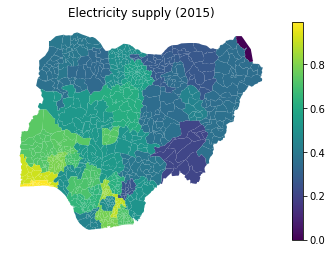

In [ ]:

# high demand areas is in blue
states = ng_lga.groupby('STATE')
ax = ng.plot(column='e_supply', legend=True)
ax.set_title('Electricity supply (2018)')
ax.set_axis_off()